*📌* Intra College Event
INFINITRIX Feedback Analysis – Task 3

To analyze student feedback data and understand overall satisfaction, sentiment, and areas for improvement.

📊 Dataset Overview

The dataset consists of student responses collected through a feedback survey, including:

Overall Event Rating

Written feedback comments

📈 Analysis & Observations
🔹 Overall Rating Analysis

The 5-star rating is the highest, indicating that most students were highly satisfied with the event.

This shows the event was successful and well-received by the majority of participants.

🔹 Sentiment Analysis of Feedback

Sentiment analysis was performed on students’ written comments.

Neutral feedback is the highest, showing that many students provided balanced or general comments without strong emotions.

Positive and Negative feedback counts are almost the same, indicating:

Students appreciated certain aspects of the event.

At the same time, a few areas require improvement.

🔍 Key Insights

High 5-star ratings confirm overall satisfaction with the event.

Neutral feedback dominance suggests students were comfortable but not overly expressive.

Equal positive and negative sentiments highlight both strengths and improvement areas.

✅ Recommendations

Maintain the quality of the event since overall ratings are very high.

Encourage students to provide more detailed feedback for better understanding.

Improve areas mentioned in negative comments such as food arrangements or time management.

🏁 Conclusion

The event was successful overall, with excellent ratings and balanced feedback. By addressing the minor concerns raised by students, future events can be made even more effective and engaging.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


In [4]:
df = pd.read_csv("College Event Feedback Form.csv")
df.head()


,Timestamp,Overall Event Rating,How was the event overall?,Which part of the event did you like the most?,Any suggestions or comments about the event?
0,2025/12/31 1:20:02 PM GMT+5:30,5,Good,Co ordination,It's good
1,2025/12/31 1:25:25 PM GMT+5:30,1,Poor,No Event contained,Poor management poor events
2,2025/12/31 1:49:14 PM GMT+5:30,3,Average,Milan,No
3,2025/12/31 1:55:30 PM GMT+5:30,2,Average,Nothing,Improve
4,2025/12/31 2:07:24 PM GMT+5:30,5,Good,Event Management,excellent


In [5]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Timestamp                                       10 non-null     object
 1   Overall Event Rating                            10 non-null     int64 
 2   How was the event overall?                      10 non-null     object
 3   Which part of the event did you like the most?  10 non-null     object
 4   Any suggestions or comments about the event?    10 non-null     object
dtypes: int64(1), object(4)
memory usage: 532.0+ bytes


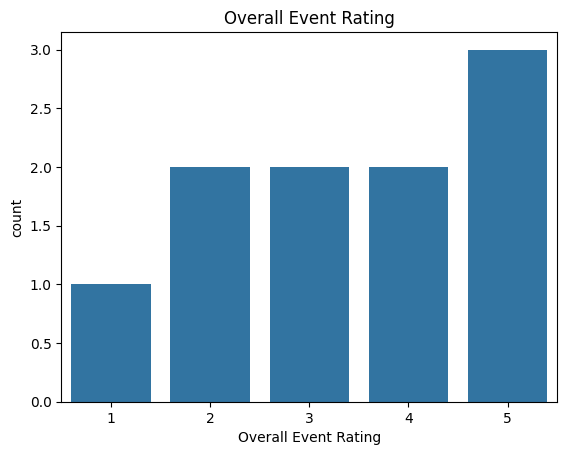

In [6]:
sns.countplot(x=df.iloc[:,1])
plt.title("Overall Event Rating")
plt.show()


In [7]:
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df['Sentiment_Score'] = df.iloc[:,-1].apply(get_sentiment)


In [8]:
df['Sentiment'] = df['Sentiment_Score'].apply(
    lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral'
)


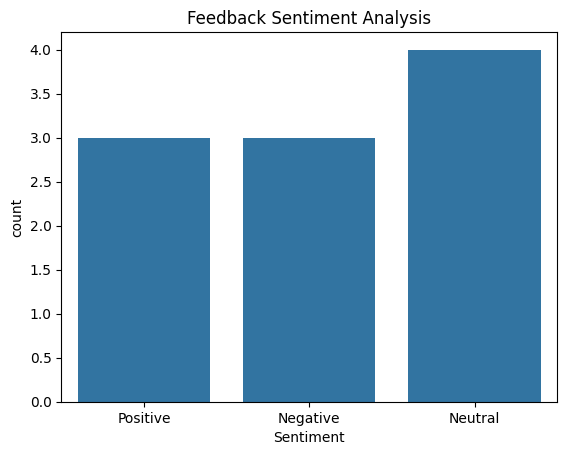

In [9]:
sns.countplot(x='Sentiment', data=df)
plt.title("Feedback Sentiment Analysis")
plt.show()


In [10]:
df[df['Sentiment'] == 'Negative'].iloc[:,-2:]


,Sentiment_Score,Sentiment
1,-0.4,Negative
7,-1.0,Negative
8,-0.4,Negative


In [11]:
avg_rating = df.iloc[:,1].mean()
print("Average Rating:", round(avg_rating, 2))


Average Rating: 3.4


In [12]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df['Sentiment_Score'] = df.iloc[:,4].apply(get_sentiment)


In [13]:
df['Sentiment'] = df['Sentiment_Score'].apply(
    lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral'
)


In [14]:
sentiment_percent = df['Sentiment'].value_counts(normalize=True) * 100
print(sentiment_percent)


Sentiment
Neutral     40.0
Positive    30.0
Negative    30.0
Name: proportion, dtype: float64


In [15]:
df[df['Sentiment'] == 'Negative'].iloc[:,[4]]


,Any suggestions or comments about the event?
1,Poor management poor events
7,very worst
8,poor


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


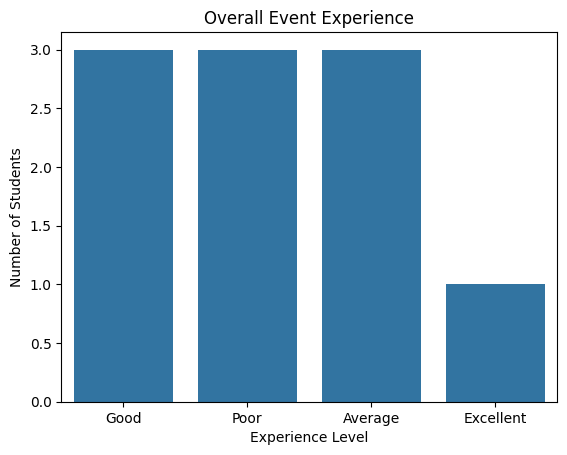

In [17]:
sns.countplot(x=df.iloc[:,2])
plt.title("Overall Event Experience")
plt.xlabel("Experience Level")
plt.ylabel("Number of Students")
plt.show()


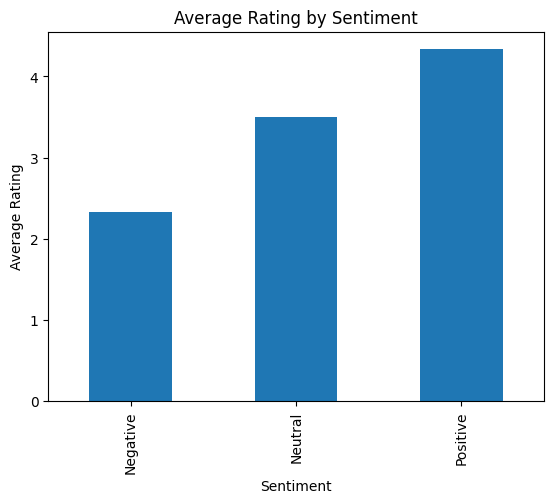

In [18]:
sentiment_rating = df.groupby('Sentiment')[df.columns[1]].mean()

sentiment_rating.plot(kind='bar')
plt.title("Average Rating by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Rating")
plt.show()


In [19]:
sentiment_percent = df['Sentiment'].value_counts(normalize=True) * 100
sentiment_percent


,proportion
Sentiment,
Neutral,40.0
Positive,30.0
Negative,30.0


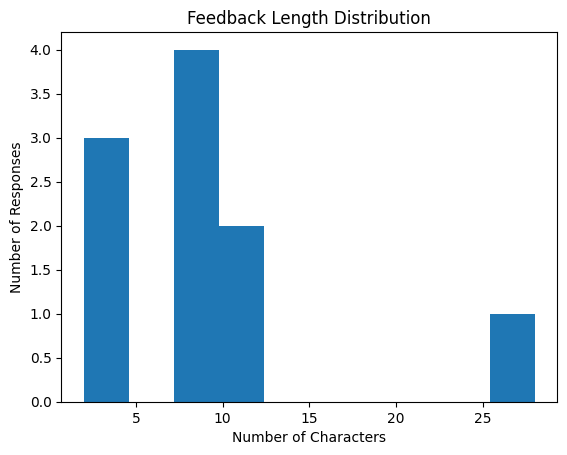

In [20]:
df['Feedback_Length'] = df.iloc[:,4].astype(str).apply(len)

plt.hist(df['Feedback_Length'])
plt.title("Feedback Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Responses")
plt.show()
